# Steps Required With FbProphet

1. Data Preprocessing With Time Series
2. Model Fitting
3. Obtaining The Forecasts
4. Plotting The Forecasts
5. Cross Validation
6. Computing Performance Metrics
7. Visualize the Performance Metrics
8. Conclusions



In [34]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df=pd.read_csv('/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [40]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [41]:
df.drop(168,axis=0,inplace=True)

In [42]:
df.columns=["ds","y"]

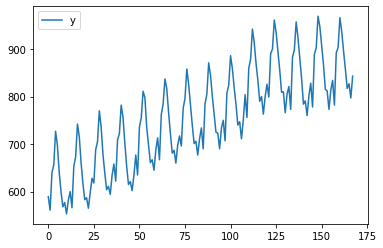

In [43]:
df.plot()

In [44]:
df['y'].shift(1)

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

Shifting to make it stationary

In [45]:
df['y']=df['y']-df['y'].shift(1)

In [46]:
df['y']

0       NaN
1     -28.0
2      79.0
3      16.0
4      71.0
       ... 
163   -38.0
164   -41.0
165    10.0
166   -30.0
167    46.0
Name: y, Length: 168, dtype: float64

In [ ]:
df['ds']=pd.to_datetime(df['ds'])

In [47]:
df.head()

,ds,y
0,1962-01,NaN
1,1962-02,-28.0
2,1962-03,79.0
3,1962-04,16.0
4,1962-05,71.0


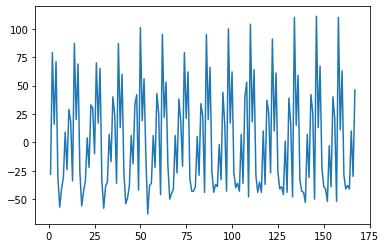

In [49]:
df['y'].plot() #Stationary time series data

In [50]:
from fbprophet import Prophet

In [52]:
df.head()

,ds,y
0,1962-01,NaN
1,1962-02,-28.0
2,1962-03,79.0
3,1962-04,16.0
4,1962-05,71.0


**Intialize the Model**

In [53]:
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
model

In [55]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [66]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=12,freq='MS')

In [67]:
df.tail()

,ds,y
163,1975-08,-38.0
164,1975-09,-41.0
165,1975-10,10.0
166,1975-11,-30.0
167,1975-12,46.0


In [68]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
175,1976-08-01
176,1976-09-01
177,1976-10-01
178,1976-11-01


In [69]:
### Prediction
prediction=model.predict(future_dates)

In [70]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.043737,18.077213,37.036987,2.043737,2.043737,24.994757,24.994757,24.994757,24.994757,24.994757,24.994757,0.0,0.0,0.0,27.038494
1,1962-02-01,2.042025,-47.091725,-28.778219,2.042025,2.042025,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,0.0,0.0,0.0,-38.213722
2,1962-03-01,2.040479,85.549508,104.586873,2.040479,2.040479,93.020043,93.020043,93.020043,93.020043,93.020043,93.020043,0.0,0.0,0.0,95.060522
3,1962-04-01,2.038768,7.473117,25.394356,2.038768,2.038768,14.325207,14.325207,14.325207,14.325207,14.325207,14.325207,0.0,0.0,0.0,16.363974
4,1962-05-01,2.037111,54.183489,72.360683,2.037111,2.037111,60.542390,60.542390,60.542390,60.542390,60.542390,60.542390,0.0,0.0,0.0,62.579502


###Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument.

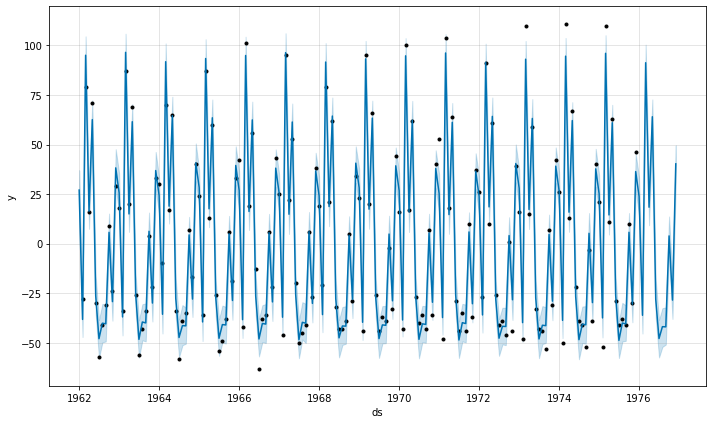

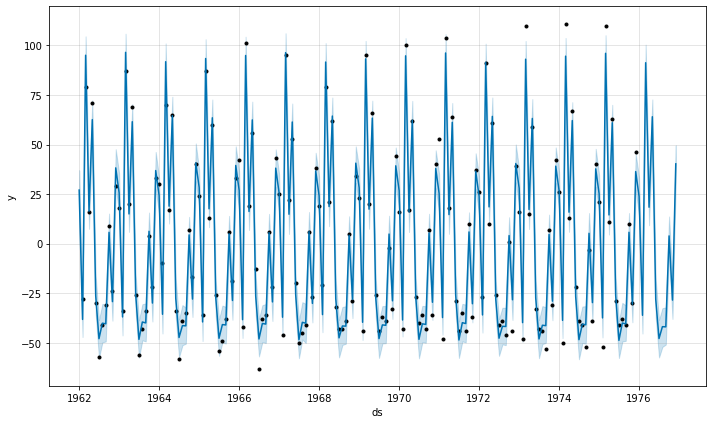

In [71]:
#### plot the predicted projection
model.plot(prediction)

 The blue line in the graph represents the predicted values while the black dots represents the data in our dataset light blue line is trends.

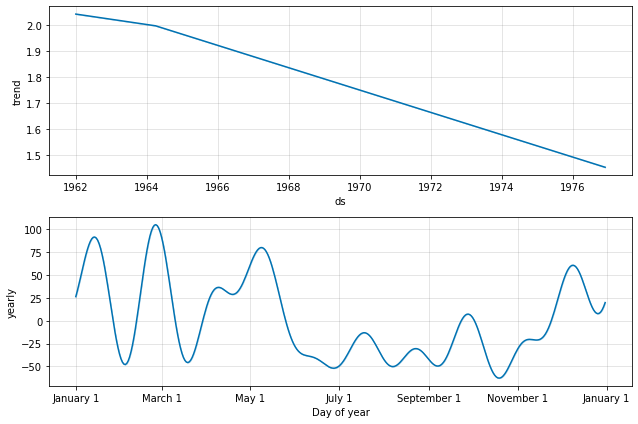

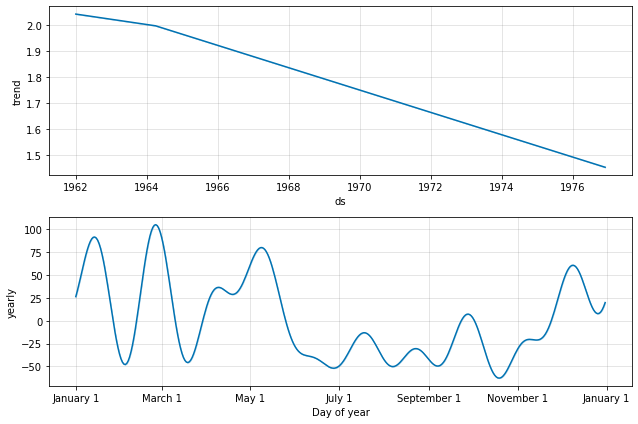

In [73]:
##### Visualize Each Components(Trends with respect to yearly manner) of new data set
model.plot_components(prediction)

###Cross Validation

Next let’s measure the forecast error using the historical data by comparing the predicted values with the actual values. In order to perform this operation select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1)Horizon the forecast horizon<br>
2)Initial the size of the initial training period<br>
3)Period the spacing between cutoff dates

In [74]:
df.shape

(168, 2)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [75]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


In [77]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.165522,-35.601281,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.513476,-29.326615,-38.0,1965-07-21
2,1965-10-01,6.103171,0.551541,11.816661,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.923677,-15.010564,-19.0,1965-07-21
4,1965-12-01,36.035431,30.624238,41.710832,33.0,1965-07-21


###Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the yhat_lower and yhat_upper estimates.

In [78]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.770852,11.125235,9.160739,0.263184,0.196639,0.416667
1,42 days,115.513644,10.747727,8.600056,0.233072,0.185216,0.500000
2,43 days,123.586976,11.116968,8.837566,0.226524,0.185216,0.500000
3,46 days,89.586428,9.465011,7.889120,0.213582,0.185216,0.541667
4,47 days,87.148284,9.335325,7.677113,0.209829,0.171733,0.562500


In [80]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.770852,11.125235,9.160739,0.263184,0.196639,0.416667
1,42 days,115.513644,10.747727,8.600056,0.233072,0.185216,0.500000
2,43 days,123.586976,11.116968,8.837566,0.226524,0.185216,0.500000
3,46 days,89.586428,9.465011,7.889120,0.213582,0.185216,0.541667
4,47 days,87.148284,9.335325,7.677113,0.209829,0.171733,0.562500
...,...,...,...,...,...,...,...
175,357 days,31.629871,5.624044,4.693559,0.132684,0.106889,0.791667
176,360 days,34.612260,5.883218,4.924323,0.144501,0.106889,0.750000
177,361 days,37.014617,6.083964,5.085869,0.148150,0.106889,0.708333
178,362 days,35.950367,5.995863,4.947491,0.146052,0.106889,0.708333


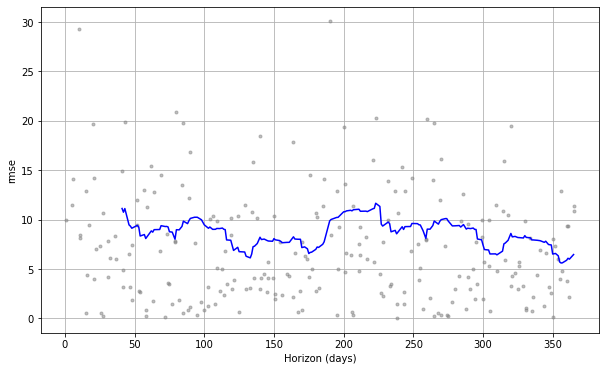

In [81]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')